Use historical_data file

Using symbol.date_txn and close_price, you have to predict- predicted_price

Then we measure accuracy using following:

For each symbol calculate: X = Median of (predicted_price-close_price)/close_price

Final_accuracy = Average of X


## Data Pre-Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

importing data from file 

In [2]:
historical_data = pd.read_excel(r'D:\TINO IQ Intern_Assignment\data\historical_data.xlsx')

In [3]:
historical_data

,symbol,date_txn,close_price,predicted_price
0,AAL,2014-12-02,47.55,47.93
1,AAL,2014-12-03,47.93,49.33
2,AAL,2014-12-04,49.33,50.68
3,AAL,2014-12-05,50.68,50.50
4,AAL,2014-12-08,50.50,48.00
...,...,...,...,...
1048570,KMF,2015-08-12,22.76,21.94
1048571,KMF,2015-08-13,21.94,22.51
1048572,KMF,2015-08-14,22.51,22.30
1048573,KMF,2015-08-17,22.30,22.10


In [4]:
historical_data.isnull().sum()

symbol               0
date_txn             0
close_price          0
predicted_price    777
dtype: int64

Droping the null values

In [5]:
historical_data.dropna(subset = ["predicted_price"],how = 'any',inplace= True)

In [6]:
historical_data

,symbol,date_txn,close_price,predicted_price
0,AAL,2014-12-02,47.55,47.93
1,AAL,2014-12-03,47.93,49.33
2,AAL,2014-12-04,49.33,50.68
3,AAL,2014-12-05,50.68,50.50
4,AAL,2014-12-08,50.50,48.00
...,...,...,...,...
1048570,KMF,2015-08-12,22.76,21.94
1048571,KMF,2015-08-13,21.94,22.51
1048572,KMF,2015-08-14,22.51,22.30
1048573,KMF,2015-08-17,22.30,22.10


Visualization of the historical_data

<function matplotlib.pyplot.show(*args, **kw)>

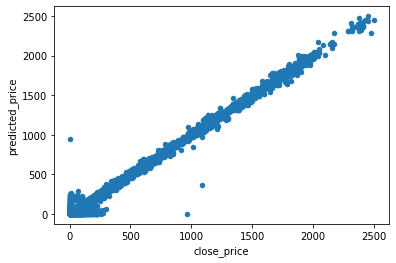

In [7]:
historical_data.plot(kind='scatter',x = 'close_price', y = 'predicted_price')
plt.show

In [8]:
#Correlation Coefficients
historical_data.corr()

,close_price,predicted_price
close_price,1.000000,0.999279
predicted_price,0.999279,1.000000


## Importing the Linear Regression Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model,metrics

In [10]:
x = historical_data.drop(['predicted_price','symbol'],axis = 1,inplace = False)
y = historical_data['predicted_price']


In [11]:
import datetime as dt
x['date_txn'] = pd.to_datetime(x['date_txn'])
x['date_txn']=x['date_txn'].map(dt.datetime.toordinal)


Splitting the data 

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 40)

In [13]:
lm = linear_model.LinearRegression()

Fitting the data into the model

In [14]:
lm=lm.fit(x_train, y_train)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred=lm.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
mean_squared_error = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

In [18]:
mean_squared_error

12.358905757034128

In [19]:
r2_score

0.9986209992644028

In [20]:
lm.intercept_

6.846222799616456

In [21]:
lm.score(x_train, y_train)

0.9985419125940959

Creating the table for x_test,y_test data and our prediction values

In [25]:
X = x_test
Y = y_test
predictions = pd.concat([X,Y],axis=1)


In [28]:
predictions.insert(3, column = "predicted_values" ,value = y_pred)

In [29]:
predictions

,date_txn,close_price,predicted_price,predicted_values
283424,737263,34.00,34.86,34.003705
936253,736142,38.82,39.13,38.834937
590033,737504,16.23,16.80,16.228444
39951,737040,42.11,41.20,42.117155
662190,736121,52.18,51.58,52.197405
...,...,...,...,...
468610,737073,8.36,8.37,8.361109
23268,736366,24.80,24.98,24.810472
942485,737332,52.47,52.33,52.476205
547064,737173,11.56,11.56,11.560724


In [30]:
close_price = pd.DataFrame(predictions['close_price'])

### Visualizing the Result

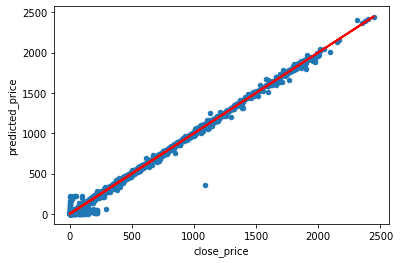

In [31]:
predicted_values.plot(kind = 'scatter', x='close_price',y = 'predicted_price')
# plotting the regression line
plt.plot(close_price,predictions['predicted_values'],color  = 'red',linewidth = 2)
plt.show()

Finding the fianl accuracy

In [33]:
predictions['median'] = (predictions['predicted_values']-predictions['close_price'])

In [34]:
pred_values = predictions['median']


In [35]:
median = pred_values.median() 


In [36]:
predictions['median'] = median/predictions['close_price']


In [37]:
predictions['median'].mean()


0.0008020372024097328